In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For Some Styling
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [2]:
df_2019 = pd.read_csv(r"Desktop\PGP-DSE Data\Machine Learning\New Datasets\January Flight Delay Prediction\data-2019.csv")
pd.set_option('display.max_columns',None)
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [3]:
df_2019.shape

(583985, 22)

In [4]:
df_2019.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5446
OP_CARRIER_FL_NUM        6839
ORIGIN_AIRPORT_ID         346
ORIGIN_AIRPORT_SEQ_ID     346
ORIGIN                    346
DEST_AIRPORT_ID           346
DEST_AIRPORT_SEQ_ID       346
DEST                      346
DEP_TIME                 1438
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_TIME                 1440
ARR_DEL15                   2
CANCELLED                   2
DIVERTED                    2
DISTANCE                 1451
Unnamed: 21                 0
dtype: int64

In [5]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
DAY_OF_MONTH             583985 non-null int64
DAY_OF_WEEK              583985 non-null int64
OP_UNIQUE_CARRIER        583985 non-null object
OP_CARRIER_AIRLINE_ID    583985 non-null int64
OP_CARRIER               583985 non-null object
TAIL_NUM                 581442 non-null object
OP_CARRIER_FL_NUM        583985 non-null int64
ORIGIN_AIRPORT_ID        583985 non-null int64
ORIGIN_AIRPORT_SEQ_ID    583985 non-null int64
ORIGIN                   583985 non-null object
DEST_AIRPORT_ID          583985 non-null int64
DEST_AIRPORT_SEQ_ID      583985 non-null int64
DEST                     583985 non-null object
DEP_TIME                 567633 non-null float64
DEP_DEL15                567630 non-null float64
DEP_TIME_BLK             583985 non-null object
ARR_TIME                 566924 non-null float64
ARR_DEL15                565963 non-null float64
CANCELLED                5839

# ==============================================================

# Exploratory Data Analysis - Jan,2019

# ==============================================================

In [6]:
# Removing redundant/Not-so-important columns from pur dataset
df_2019.drop(columns=['OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','TAIL_NUM','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','Unnamed: 21'],axis=1,inplace=True)
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,3280,1195302,GNV,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,3281,1348702,MSP,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,3282,1143302,DTW,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,3283,1524906,TLH,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,3284,1039707,ATL,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [7]:
print(df_2019['OP_CARRIER_FL_NUM'].min())
print(df_2019['OP_CARRIER_FL_NUM'].max())

1
7439


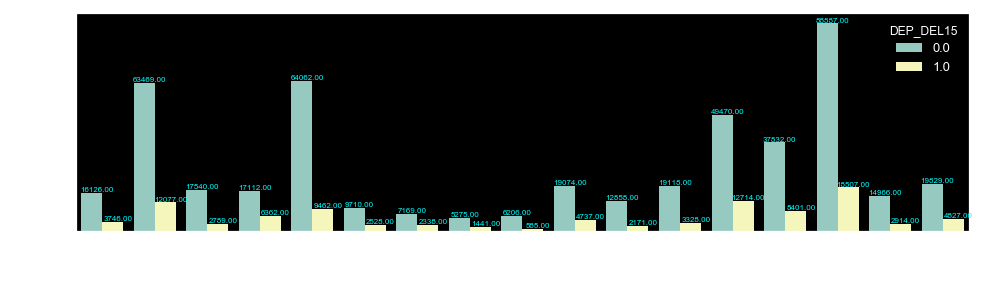

In [8]:
# Checking relation of Carrier Type with Delayed Departure
plt.figure(figsize=(16,4))
graph = sns.countplot(x=df_2019['OP_CARRIER'].sort_values(),hue='DEP_DEL15',data=df_2019)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=8)

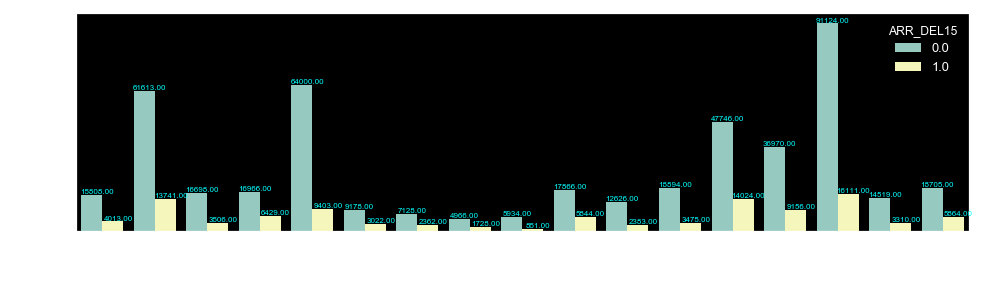

In [9]:
# Checking relation of Carrier Type with Delayed Arrival
plt.figure(figsize=(16,4))
graph = sns.countplot(x=df_2019['OP_CARRIER'].sort_values(),hue='ARR_DEL15',data=df_2019)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=8)

In [10]:
# "ORIGIN_AIRPORT_SEQ_ID" & "DEST_AIRPORT_SEQ_ID" are not doing anything, they are just redundant values as there is a 
# separate columns for the same that are "ORIGIN" & "DESTINATION". So, removing them from the dataset
df_2019.drop(columns=['ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID'],axis=1,inplace=True)
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,3280,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,3281,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,3282,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,3283,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,3284,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


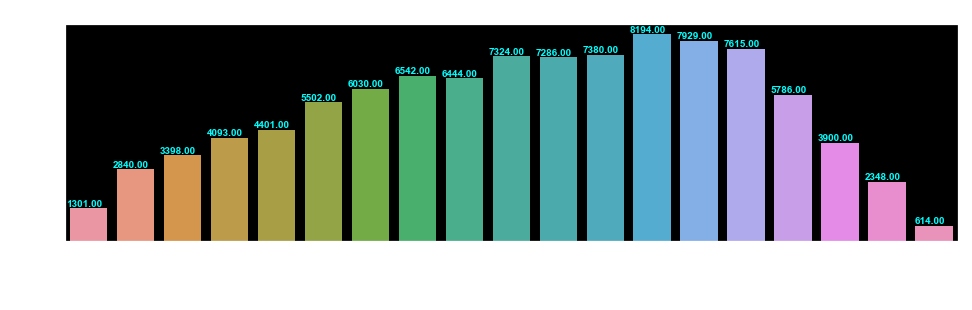

In [11]:
# We can also check at which hour(s) of the day most of the delays in departure happened.
x = df_2019[df_2019['DEP_DEL15']==1]
plt.figure(figsize=(16,4))
graph = sns.countplot(x=x['DEP_TIME_BLK'].sort_values(),data=df_2019)
plt.title("Departure Delays",fontsize=15,fontweight='bold')
plt.ylabel("# of Delays",fontsize=12,fontweight='bold')
plt.xlabel("Departure Time Blocks",fontsize=12,fontweight='bold')
plt.tick_params(axis='x',labelrotation=20)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=10,fontweight='bold')

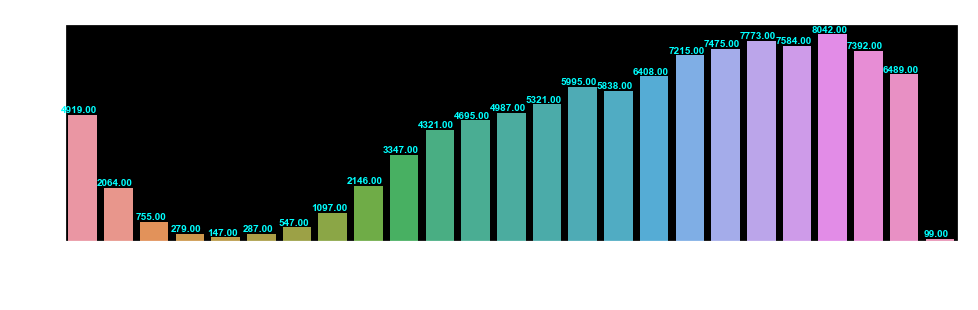

In [12]:
# We can also check at which hour(s) of the day most of the delays in arrival happened.
df_2019.dropna(axis=0,inplace=True)
s = df_2019['ARR_TIME'].astype(int)
s = s.astype(str)
lx = [int(i) for i in list(s)]
l = []
for i in lx:
    a = int(i/100)
    if a < 10: string = "0"+str(a)+"00"+"-"+str(a)+"59"
    else: string = str(a)+"00"+"-"+str(a)+"59"
    l.append(string)
df_2019['ARR_TIME_BLK'] = l

# Plotting the graph
x = df_2019[df_2019['ARR_DEL15']==1]
plt.figure(figsize=(16,4))
graph = sns.countplot(x=x['ARR_TIME_BLK'].sort_values(),data=x)
plt.title("Arrival Delays",fontsize=15,fontweight='bold')
plt.ylabel("# of Delays",fontsize=12,fontweight='bold')
plt.xlabel("Arrival Time Blocks",fontsize=12,fontweight='bold')
plt.tick_params(axis='x',labelrotation=20)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=10,fontweight='bold')

31.0
4983.0


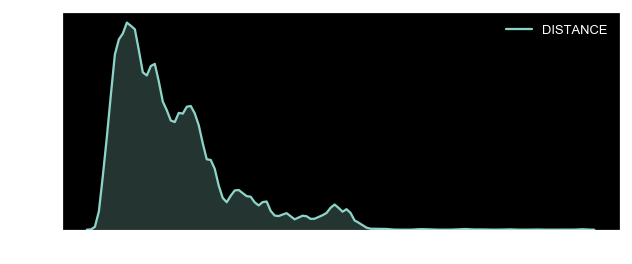

In [13]:
# We can also check impact of distance on departure delay --> By Binning
# We can also check impact of distance on arrival delay --> By Binning
print(df_2019['DISTANCE'].min())
print(df_2019['DISTANCE'].max())
plt.figure(figsize=(10,4))
sns.kdeplot(df_2019['DISTANCE'],shade=True)

In [14]:
# Let's try to make 10 bins of equal sizes
# Doing for Delayed Departure
x1 = df_2019[df_2019['DEP_DEL15']==1]
l1 = ['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000','3000-3500','3500-4000','4000-4500','4500-5000']
lx = list(x1['DISTANCE'])
l2 = [0 for i in range(10)]
for i in lx:
    if i>=0 and i<500: l2[0] = l2[0]+1
    elif i>=500 and i<1000: l2[1] = l2[1]+1
    elif i>=1000 and i<1500: l2[2] = l2[2]+1
    elif i>=1500 and i<2000: l2[3] = l2[3]+1
    elif i>=2000 and i<2500: l2[4] = l2[4]+1
    elif i>=2500 and i<3000: l2[5] = l2[5]+1
    elif i>=3000 and i<3500: l2[6] = l2[6]+1
    elif i>=3500 and i<4000: l2[7] = l2[7]+1
    elif i>=4000 and i<4500: l2[8] = l2[8]+1
    elif i>=4500 and i<5000: l2[9] = l2[9]+1
l3 = pd.DataFrame(list(zip(l1,l2)),columns=['Distance Range','#Delays'])

# Doing for Delayed Arrival
x2 = df_2019[df_2019['ARR_DEL15']==1]
l1 = ['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000','3000-3500','3500-4000','4000-4500','4500-5000']
lx = list(x2['DISTANCE'])
l2 = [0 for i in range(10)]
for i in lx:
    if i>=0 and i<500: l2[0] = l2[0]+1
    elif i>=500 and i<1000: l2[1] = l2[1]+1
    elif i>=1000 and i<1500: l2[2] = l2[2]+1
    elif i>=1500 and i<2000: l2[3] = l2[3]+1
    elif i>=2000 and i<2500: l2[4] = l2[4]+1
    elif i>=2500 and i<3000: l2[5] = l2[5]+1
    elif i>=3000 and i<3500: l2[6] = l2[6]+1
    elif i>=3500 and i<4000: l2[7] = l2[7]+1
    elif i>=4000 and i<4500: l2[8] = l2[8]+1
    elif i>=4500 and i<5000: l2[9] = l2[9]+1
l4 = pd.DataFrame(list(zip(l1,l2)),columns=['Distance Range','#Delays'])

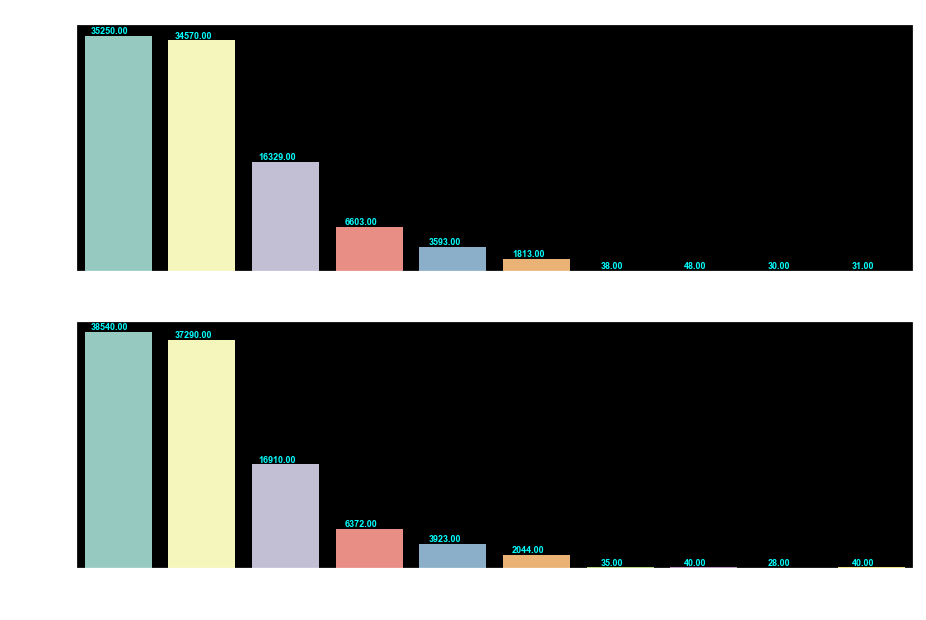

In [15]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(2,1, figsize=(15,10))

graph = sns.barplot(x='Distance Range',y='#Delays',data=l3,ax=axes[0])
axes[0].set_title("#Delays - Delayed Departure",fontsize=15,fontweight='bold')
axes[0].set_xlabel("")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

graph = sns.barplot(x='Distance Range',y='#Delays',data=l4,ax=axes[1])
axes[1].set_title("#Delays - Delayed Arrival",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

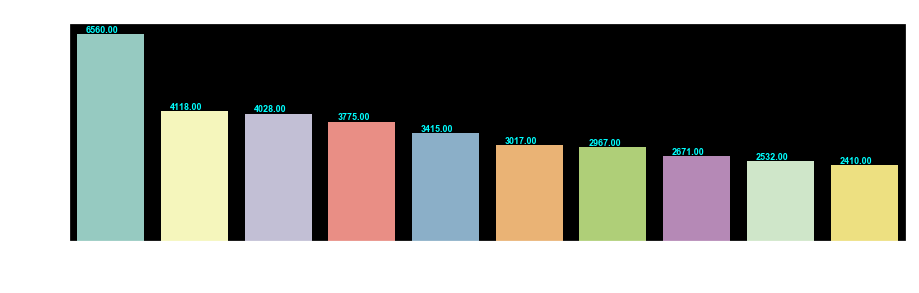

In [16]:
# We can also check top 10 Origins for departure delay
import operator
x = df_2019[df_2019['DEP_DEL15']==1]
l1,lx = list(x['ORIGIN'].unique()),list(x['ORIGIN'])
l2,l3 = [],[]
for i in l1:
    l2.append(lx.count(i))
l3 = pd.DataFrame(sorted(list(zip(l1,l2)),key=operator.itemgetter(1),reverse=True)[:10],columns=['Origin','#Delays'])

# Plotting the graph
plt.figure(figsize=(15,4))
graph = sns.barplot(x='Origin',y='#Delays',data=l3)
plt.title("Top 10 #Delays by Origin",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

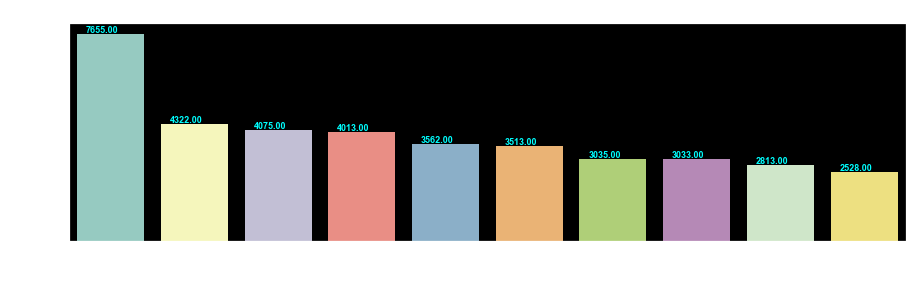

In [17]:
# We can also check top 10 Origins for arrival delay
import operator
x = df_2019[df_2019['ARR_DEL15']==1]
l1,lx = list(x['ORIGIN'].unique()),list(x['ORIGIN'])
l2,l3 = [],[]
for i in l1:
    l2.append(lx.count(i))
l3 = pd.DataFrame(sorted(list(zip(l1,l2)),key=operator.itemgetter(1),reverse=True)[:10],columns=['Origin','#Delays'])

# Plotting the graph
plt.figure(figsize=(15,4))
graph = sns.barplot(x='Origin',y='#Delays',data=l3)
plt.title("Top 10 #Delays by Arrival",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

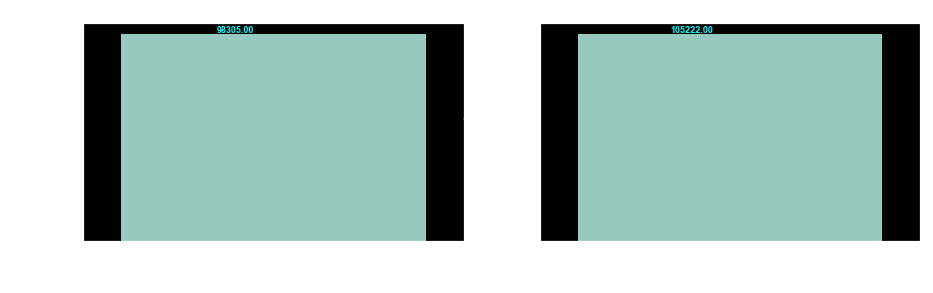

In [18]:
# We can check from the delayed flights how much of them were diverted
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,2, figsize=(15,4))

x = df_2019[df_2019['DEP_DEL15']==1]
graph = sns.countplot(x='DIVERTED',data=x,ax=axes[0])
axes[0].set_title("Delayed Departure Flights Which Were Diverted",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

x = df_2019[df_2019['ARR_DEL15']==1]
graph = sns.countplot(x='DIVERTED',data=x,ax=axes[1])
axes[1].set_title("Delayed Arrival Flights Which Were Diverted",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

In [19]:
len(df_2019[df_2019['DIVERTED']==1])

0

In [20]:
# There are no flights which were diverted in Jan-2019, we can drop this column from our dataset provided there aren't any
# in Jan-2020 dataset

In [21]:
# We can check relation of cancelled flights with the  arrival delay
len(df_2019[df_2019['CANCELLED']==1])

0

In [22]:
# There are no flights which were cencelled in Jan-2019, we can drop this column from our dataset provided there aren't any
# in Jan-2020 dataset

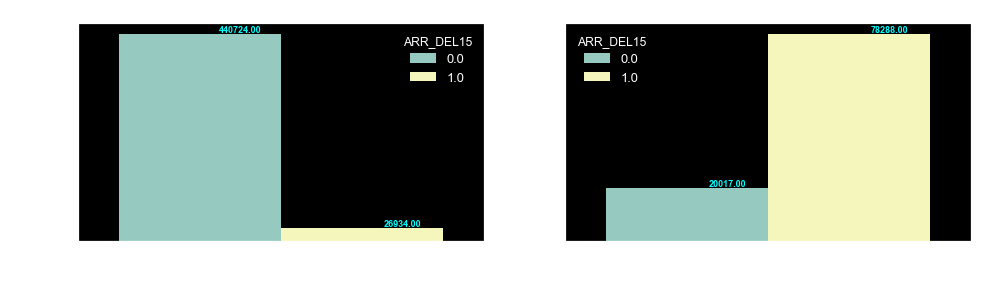

In [23]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,2, figsize=(16,4))

x1 = df_2019[df_2019['DEP_DEL15']==0]
graph = sns.countplot(x='DEP_DEL15',data=x1,hue='ARR_DEL15',ax=axes[0])
axes[0].set_title("Chances of Delayed Arrival Given On-Time Departure",fontsize=15,fontweight='bold')
axes[0].set_xlabel("Delayed Departure",fontsize=10)
axes[0].set_ylabel("#Delays",fontsize=10)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

x2 = df_2019[df_2019['DEP_DEL15']==1]
graph = sns.countplot(x='DEP_DEL15',data=x2,hue='ARR_DEL15',ax=axes[1])
axes[1].set_title("Chances of Delayed Arrival Given Delayed Departure",fontsize=15,fontweight='bold')
axes[1].set_xlabel("Delayed Departure",fontsize=10)
axes[1].set_ylabel("#Delays",fontsize=10)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

# ==============================================================

# Feature Extraction - Jan,2019

# ==============================================================

In [24]:
# Now we will deal with Departure Time
df_2019 = df_2019.dropna(axis=0)
df_2019['DEP_TIME'] = df_2019['DEP_TIME'].astype(int)
df_2019['DEP_TIME'] = df_2019['DEP_TIME'].astype(str)

In [25]:
lx = list(df_2019['DEP_TIME'])
l1,l2 = [],[]
for i in lx:
    a = i[-2:]
    b = i[:-2]
    if a == '': l2.append(0)
    else: l2.append(int(a))
    
    if b == '': l1.append(0)
    else: l1.append(int(b))
df_2019['DEP_HOUR'] = l1
df_2019['DEP_MIN'] = l2
df_2019.drop('DEP_TIME',axis=1,inplace=True)
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,ARR_TIME_BLK,DEP_HOUR,DEP_MIN
0,1,2,9E,3280,GNV,ATL,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,0700-759,6,1
1,1,2,9E,3281,MSP,CVG,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,1600-1659,13,59
2,1,2,9E,3282,DTW,CVG,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,1300-1359,12,15
3,1,2,9E,3283,TLH,ATL,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,1600-1659,15,21
4,1,2,9E,3284,ATL,FSM,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,1900-1959,18,47


In [26]:
# Now we will deal with Arrival Time
df_2019 = df_2019.dropna(axis=0)
df_2019['ARR_TIME'] = df_2019['ARR_TIME'].astype(int)
df_2019['ARR_TIME'] = df_2019['ARR_TIME'].astype(str)

lx = list(df_2019['ARR_TIME'])
l1,l2 = [],[]
for i in lx:
    a = i[-2:]
    b = i[:-2]
    if a == '': l2.append(0)
    else: l2.append(int(a))
    
    if b == '': l1.append(0)
    else: l1.append(int(b))

df_2019['ARR_HOUR'] = l1
df_2019['ARR_MIN'] = l2
df_2019.drop('ARR_TIME',axis=1,inplace=True)
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,ARR_TIME_BLK,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN
0,1,2,9E,3280,GNV,ATL,0.0,0600-0659,0.0,0.0,0.0,300.0,0700-759,6,1,7,22
1,1,2,9E,3281,MSP,CVG,0.0,1400-1459,0.0,0.0,0.0,596.0,1600-1659,13,59,16,33
2,1,2,9E,3282,DTW,CVG,0.0,1200-1259,0.0,0.0,0.0,229.0,1300-1359,12,15,13,29
3,1,2,9E,3283,TLH,ATL,0.0,1500-1559,0.0,0.0,0.0,223.0,1600-1659,15,21,16,25
4,1,2,9E,3284,ATL,FSM,0.0,1900-1959,0.0,0.0,0.0,579.0,1900-1959,18,47,19,40


# ==============================================================

# Feature Scaling - Jan,2019

# ==============================================================

In [27]:
df_2019.drop(columns=['OP_CARRIER_FL_NUM','DEP_TIME_BLK','ARR_TIME_BLK','CANCELLED','DIVERTED'],axis=1,inplace=True)
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_DEL15,ARR_DEL15,DISTANCE,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN
0,1,2,9E,GNV,ATL,0.0,0.0,300.0,6,1,7,22
1,1,2,9E,MSP,CVG,0.0,0.0,596.0,13,59,16,33
2,1,2,9E,DTW,CVG,0.0,0.0,229.0,12,15,13,29
3,1,2,9E,TLH,ATL,0.0,0.0,223.0,15,21,16,25
4,1,2,9E,ATL,FSM,0.0,0.0,579.0,18,47,19,40


In [28]:
# Applying Feature Encoding on Categorical Columns
cat_cols = ['OP_CARRIER','ORIGIN','DEST']
df_cat = pd.DataFrame()
for i in cat_cols:
    fe = df_2019.groupby(i).size()/len(df_2019)
    df_cat[i] = df_2019[i].map(fe)
df_cat.head()

,OP_CARRIER,ORIGIN,DEST
0,0.035022,0.000622,0.054415
1,0.035022,0.021061,0.006347
2,0.035022,0.020763,0.006347
3,0.035022,0.000852,0.054415
4,0.035022,0.054390,0.000295


In [29]:
df_2019['OP_CARRIER'] = df_cat['OP_CARRIER']
df_2019['ORIGIN'] = df_cat['ORIGIN']
df_2019['DEST'] = df_cat['DEST']
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_DEL15,ARR_DEL15,DISTANCE,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN
0,1,2,0.035022,0.000622,0.054415,0.0,0.0,300.0,6,1,7,22
1,1,2,0.035022,0.021061,0.006347,0.0,0.0,596.0,13,59,16,33
2,1,2,0.035022,0.020763,0.006347,0.0,0.0,229.0,12,15,13,29
3,1,2,0.035022,0.000852,0.054415,0.0,0.0,223.0,15,21,16,25
4,1,2,0.035022,0.054390,0.000295,0.0,0.0,579.0,18,47,19,40


In [30]:
df_2019['ARR_DEL15'].value_counts()

0.0    460741
1.0    105222
Name: ARR_DEL15, dtype: int64

# ==============================================================

# Exploratory Data Analysis - Jan,2020

# ==============================================================

In [31]:
df_2020 = pd.read_csv(r"Desktop\PGP-DSE Data\Machine Learning\New Datasets\January Flight Delay Prediction\data-2020.csv")
pd.set_option('display.max_columns',None)
df_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [32]:
df_2020.shape

(607346, 22)

In [33]:
df_2020.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5444
OP_CARRIER_FL_NUM        6720
ORIGIN_AIRPORT_ID         351
ORIGIN_AIRPORT_SEQ_ID     351
ORIGIN                    351
DEST_AIRPORT_ID           350
DEST_AIRPORT_SEQ_ID       350
DEST                      350
DEP_TIME                 1432
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_TIME                 1440
ARR_DEL15                   2
CANCELLED                   2
DIVERTED                    2
DISTANCE                 1471
Unnamed: 21                 0
dtype: int64

In [34]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
DAY_OF_MONTH             607346 non-null int64
DAY_OF_WEEK              607346 non-null int64
OP_UNIQUE_CARRIER        607346 non-null object
OP_CARRIER_AIRLINE_ID    607346 non-null int64
OP_CARRIER               607346 non-null object
TAIL_NUM                 606648 non-null object
OP_CARRIER_FL_NUM        607346 non-null int64
ORIGIN_AIRPORT_ID        607346 non-null int64
ORIGIN_AIRPORT_SEQ_ID    607346 non-null int64
ORIGIN                   607346 non-null object
DEST_AIRPORT_ID          607346 non-null int64
DEST_AIRPORT_SEQ_ID      607346 non-null int64
DEST                     607346 non-null object
DEP_TIME                 600682 non-null float64
DEP_DEL15                600647 non-null float64
DEP_TIME_BLK             607346 non-null object
ARR_TIME                 600271 non-null float64
ARR_DEL15                599268 non-null float64
CANCELLED                6073

In [35]:
# Removing redundant/Not-so-important columns from pur dataset
df_2020.drop(columns=['OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','TAIL_NUM','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','Unnamed: 21'],axis=1,inplace=True)
df_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,3,EV,4397,1393007,ORD,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0
1,1,3,EV,4401,1537002,TUL,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0
2,1,3,EV,4404,1161802,EWR,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0
3,1,3,EV,4405,1078105,BTR,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0
4,1,3,EV,4407,1452401,RIC,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0


In [36]:
print(df_2020['OP_CARRIER_FL_NUM'].min())
print(df_2020['OP_CARRIER_FL_NUM'].max())

1
6860


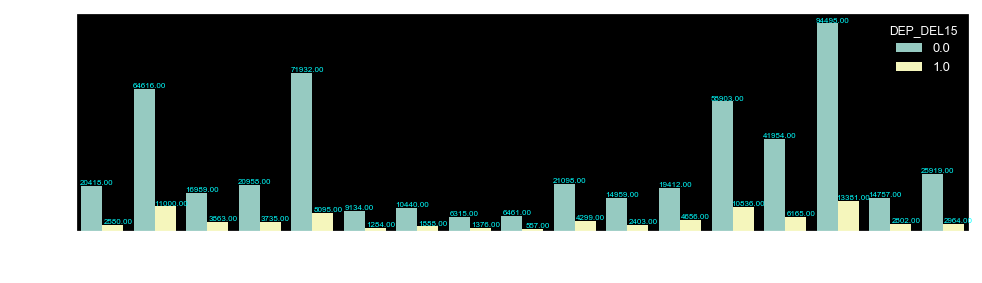

In [37]:
# Checking relation of Carrier Type with Delayed Departure
plt.figure(figsize=(16,4))
graph = sns.countplot(x=df_2020['OP_CARRIER'].sort_values(),hue='DEP_DEL15',data=df_2020)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=8)

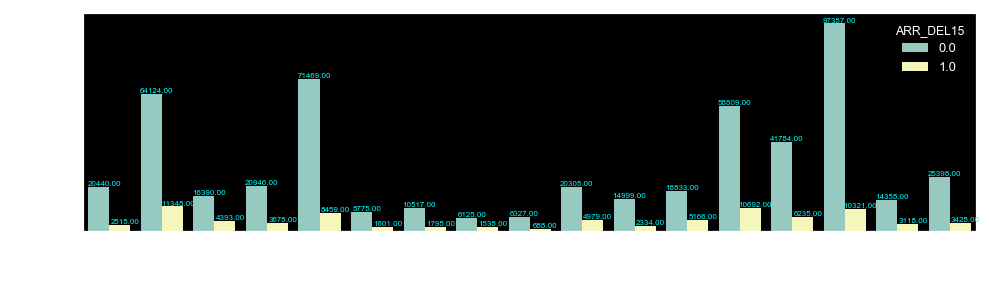

In [38]:
# Checking relation of Carrier Type with Delayed Arrival
plt.figure(figsize=(16,4))
graph = sns.countplot(x=df_2020['OP_CARRIER'].sort_values(),hue='ARR_DEL15',data=df_2020)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=8)

In [39]:
# "ORIGIN_AIRPORT_SEQ_ID" & "DEST_AIRPORT_SEQ_ID" are not doing anything, they are just redundant values as there is a 
# separate columns for the same that are "ORIGIN" & "DESTINATION". So, removing them from the dataset
df_2020.drop(columns=['ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID'],axis=1,inplace=True)
df_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,3,EV,4397,ORD,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0
1,1,3,EV,4401,TUL,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0
2,1,3,EV,4404,EWR,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0
3,1,3,EV,4405,BTR,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0
4,1,3,EV,4407,RIC,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0


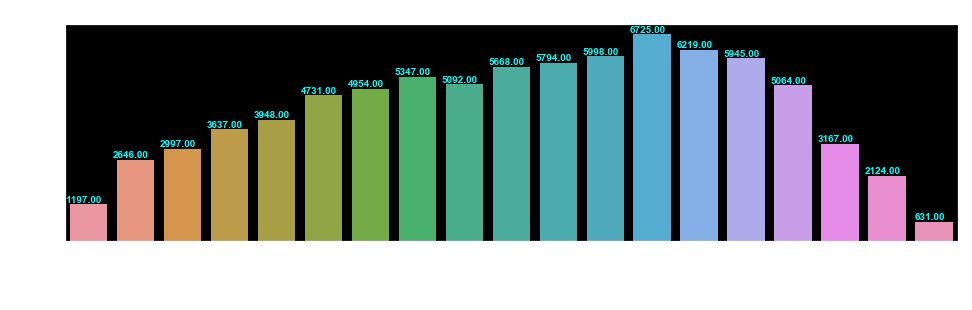

In [40]:
# We can also check at which hour(s) of the day most of the delays in departure happened.
x = df_2020[df_2020['DEP_DEL15']==1]
plt.figure(figsize=(16,4))
graph = sns.countplot(x=x['DEP_TIME_BLK'].sort_values(),data=df_2020)
plt.title("Departure Delays",fontsize=15,fontweight='bold')
plt.ylabel("# of Delays",fontsize=12,fontweight='bold')
plt.xlabel("Departure Time Blocks",fontsize=12,fontweight='bold')
plt.tick_params(axis='x',labelrotation=20)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=10,fontweight='bold')

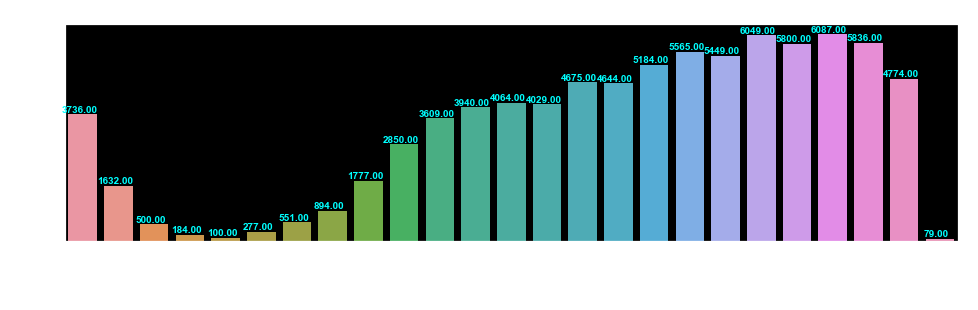

In [41]:
# We can also check at which hour(s) of the day most of the delays in arrival happened.
df_2020.dropna(axis=0,inplace=True)
s = df_2020['ARR_TIME'].astype(int)
s = s.astype(str)
lx = [int(i) for i in list(s)]
l = []
for i in lx:
    a = int(i/100)
    if a < 10: string = "0"+str(a)+"00"+"-"+str(a)+"59"
    else: string = str(a)+"00"+"-"+str(a)+"59"
    l.append(string)
df_2020['ARR_TIME_BLK'] = l

# Plotting the graph
x = df_2020[df_2020['ARR_DEL15']==1]
plt.figure(figsize=(16,4))
graph = sns.countplot(x=x['ARR_TIME_BLK'].sort_values(),data=x)
plt.title("Arrival Delays",fontsize=15,fontweight='bold')
plt.ylabel("# of Delays",fontsize=12,fontweight='bold')
plt.xlabel("Arrival Time Blocks",fontsize=12,fontweight='bold')
plt.tick_params(axis='x',labelrotation=20)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=10,fontweight='bold')


31.0
5095.0


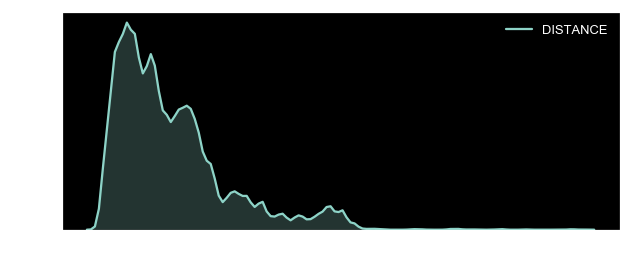

In [42]:
# We can also check impact of distance on departure delay --> By Binning
# We can also check impact of distance on arrival delay --> By Binning
print(df_2020['DISTANCE'].min())
print(df_2020['DISTANCE'].max())
plt.figure(figsize=(10,4))
sns.kdeplot(df_2020['DISTANCE'],shade=True)

In [43]:
# Let's try to make 11 bins of equal sizes
# Doing for Delayed Departure
x1 = df_2020[df_2020['DEP_DEL15']==1]
l1 = ['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000','3000-3500','3500-4000','4000-4500','4500-5000','5000-5500']
lx = list(x1['DISTANCE'])
l2 = [0 for i in range(11)]
for i in lx:
    if i>=0 and i<500: l2[0] = l2[0]+1
    elif i>=500 and i<1000: l2[1] = l2[1]+1
    elif i>=1000 and i<1500: l2[2] = l2[2]+1
    elif i>=1500 and i<2000: l2[3] = l2[3]+1
    elif i>=2000 and i<2500: l2[4] = l2[4]+1
    elif i>=2500 and i<3000: l2[5] = l2[5]+1
    elif i>=3000 and i<3500: l2[6] = l2[6]+1
    elif i>=3500 and i<4000: l2[7] = l2[7]+1
    elif i>=4000 and i<4500: l2[8] = l2[8]+1
    elif i>=4500 and i<5000: l2[9] = l2[9]+1
    elif i>=5000 and i<5500: l2[10] = l2[10]+1
l3 = pd.DataFrame(list(zip(l1,l2)),columns=['Distance Range','#Delays'])

# Doing for Delayed Arrival
x2 = df_2020[df_2020['ARR_DEL15']==1]
l1 = ['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000','3000-3500','3500-4000','4000-4500','4500-5000']
lx = list(x2['DISTANCE'])
l2 = [0 for i in range(11)]
for i in lx:
    if i>=0 and i<500: l2[0] = l2[0]+1
    elif i>=500 and i<1000: l2[1] = l2[1]+1
    elif i>=1000 and i<1500: l2[2] = l2[2]+1
    elif i>=1500 and i<2000: l2[3] = l2[3]+1
    elif i>=2000 and i<2500: l2[4] = l2[4]+1
    elif i>=2500 and i<3000: l2[5] = l2[5]+1
    elif i>=3000 and i<3500: l2[6] = l2[6]+1
    elif i>=3500 and i<4000: l2[7] = l2[7]+1
    elif i>=4000 and i<4500: l2[8] = l2[8]+1
    elif i>=4500 and i<5000: l2[9] = l2[9]+1
    elif i>=5000 and i<5500: l2[10] = l2[10]+1
l4 = pd.DataFrame(list(zip(l1,l2)),columns=['Distance Range','#Delays'])

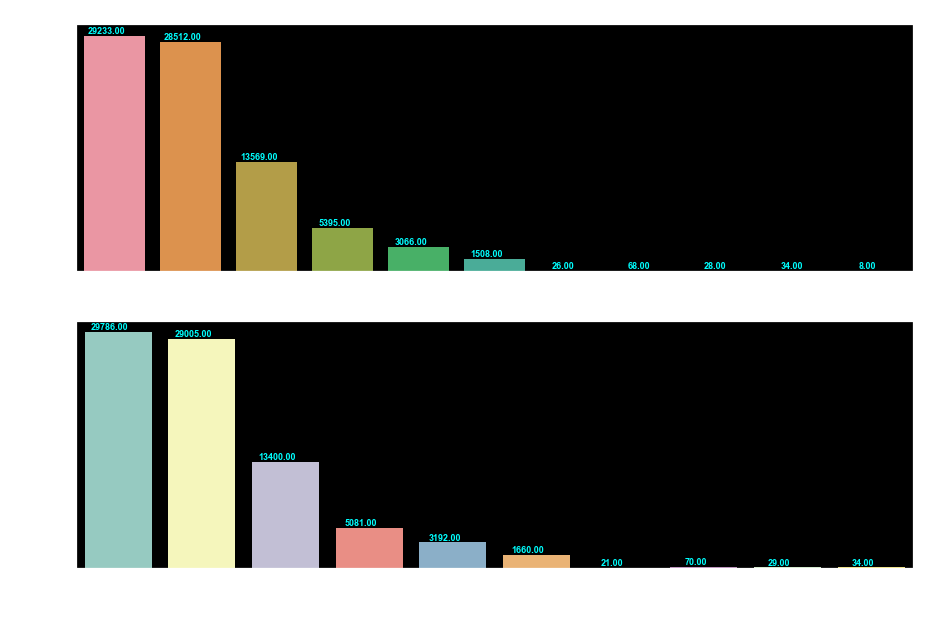

In [44]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(2,1, figsize=(15,10))

graph = sns.barplot(x='Distance Range',y='#Delays',data=l3,ax=axes[0])
axes[0].set_title("#Delays - Delayed Departure",fontsize=15,fontweight='bold')
axes[0].set_xlabel("")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

graph = sns.barplot(x='Distance Range',y='#Delays',data=l4,ax=axes[1])
axes[1].set_title("#Delays - Delayed Arrival",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

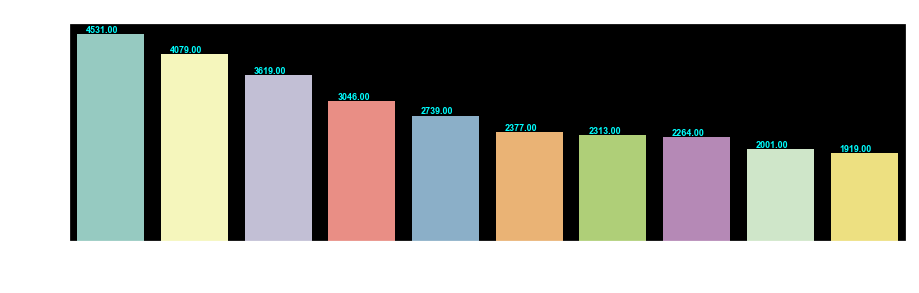

In [45]:
# We can also check top 10 Origins for departure delay
import operator
x = df_2020[df_2020['DEP_DEL15']==1]
l1,lx = list(x['ORIGIN'].unique()),list(x['ORIGIN'])
l2,l3 = [],[]
for i in l1:
    l2.append(lx.count(i))
l3 = pd.DataFrame(sorted(list(zip(l1,l2)),key=operator.itemgetter(1),reverse=True)[:10],columns=['Origin','#Delays'])

# Plotting the graph
plt.figure(figsize=(15,4))
graph = sns.barplot(x='Origin',y='#Delays',data=l3)
plt.title("Top 10 #Delays by Origin",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

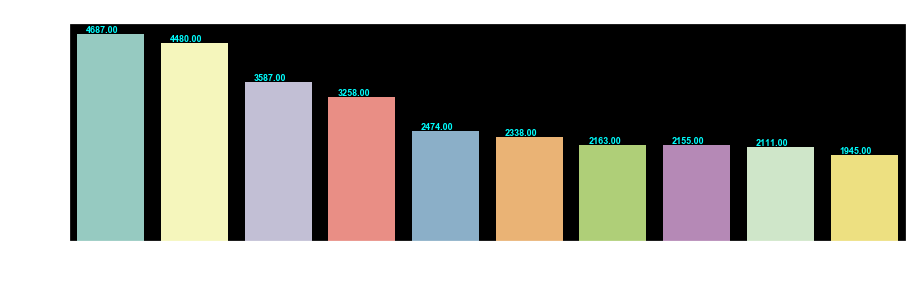

In [46]:
# We can also check top 10 Origins for arrival delay
import operator
x = df_2020[df_2020['ARR_DEL15']==1]
l1,lx = list(x['ORIGIN'].unique()),list(x['ORIGIN'])
l2,l3 = [],[]
for i in l1:
    l2.append(lx.count(i))
l3 = pd.DataFrame(sorted(list(zip(l1,l2)),key=operator.itemgetter(1),reverse=True)[:10],columns=['Origin','#Delays'])

# Plotting the graph
plt.figure(figsize=(15,4))
graph = sns.barplot(x='Origin',y='#Delays',data=l3)
plt.title("Top 10 #Delays by Arrival",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

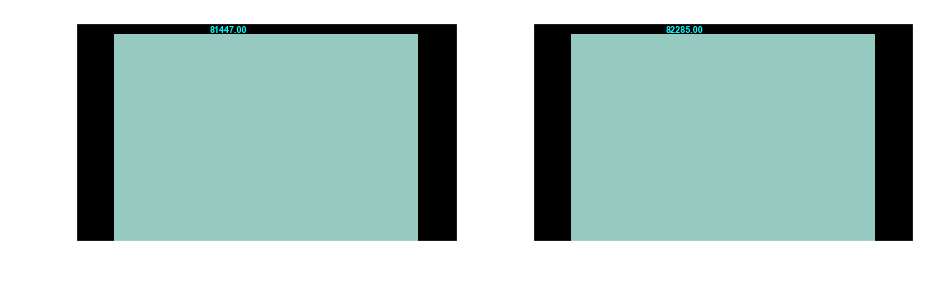

In [47]:
# We can check from the delayed flights how much of them were diverted
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,2, figsize=(15,4))

x = df_2020[df_2020['DEP_DEL15']==1]
graph = sns.countplot(x='DIVERTED',data=x,ax=axes[0])
axes[0].set_title("Delayed Departure Flights Which Were Diverted",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

x = df_2020[df_2020['ARR_DEL15']==1]
graph = sns.countplot(x='DIVERTED',data=x,ax=axes[1])
axes[1].set_title("Delayed Arrival Flights Which Were Diverted",fontsize=15,fontweight='bold')
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

In [48]:
len(df_2020[df_2020['DIVERTED']==1])

0

In [49]:
# There are no flights which were diverted in Jan-2020
# We can drop this column from our dataset as there aren't any diverted flights in both the datasets.

In [50]:
# We can check relation of cancelled flights with the  arrival delay
len(df_2020[df_2020['CANCELLED']==1])

0

In [51]:
# There are no flights which were cancelled in Jan-2020
# We can drop this column from our dataset as there aren't any cancelled flights in both the datasets.

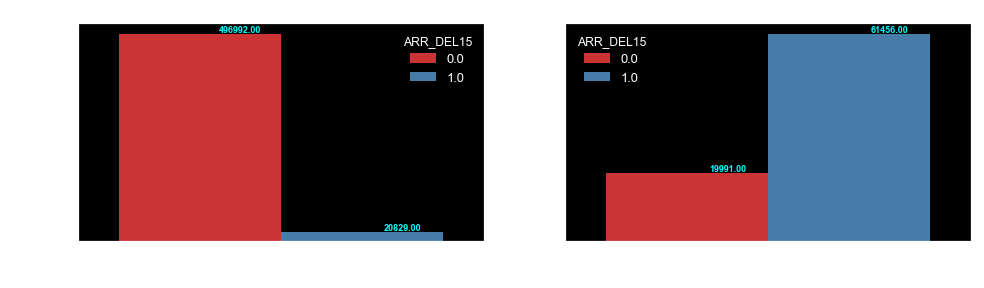

In [52]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,2, figsize=(16,4))

x1 = df_2020[df_2020['DEP_DEL15']==0]
graph = sns.countplot(x='DEP_DEL15',data=x1,hue='ARR_DEL15',ax=axes[0],palette="Set1")
axes[0].set_title("Chances of Delayed Arrival Given On-Time Departure",fontsize=15,fontweight='bold')
axes[0].set_xlabel("Delayed Departure",fontsize=10)
axes[0].set_ylabel("#Delays",fontsize=10)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

x2 = df_2020[df_2020['DEP_DEL15']==1]
graph = sns.countplot(x='DEP_DEL15',data=x2,hue='ARR_DEL15',ax=axes[1],palette="Set1")
axes[1].set_title("Chances of Delayed Arrival Given Delayed Departure",fontsize=15,fontweight='bold')
axes[1].set_xlabel("Delayed Departure",fontsize=10)
axes[1].set_ylabel("#Delays",fontsize=10)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'cyan',fontsize=9,fontweight='bold')

# ==============================================================

# Feature Extraction - Jan,2020

# ==============================================================

In [53]:
# Now we will deal with Departure Time
df_2020 = df_2020.dropna(axis=0)
df_2020['DEP_TIME'] = df_2020['DEP_TIME'].astype(int)
df_2020['DEP_TIME'] = df_2020['DEP_TIME'].astype(str)

In [54]:
lx = list(df_2020['DEP_TIME'])
l1,l2 = [],[]
for i in lx:
    a = i[-2:]
    b = i[:-2]
    if a == '': l2.append(0)
    else: l2.append(int(a))
    
    if b == '': l1.append(0)
    else: l1.append(int(b))
df_2020['DEP_HOUR'] = l1
df_2020['DEP_MIN'] = l2
df_2020.drop('DEP_TIME',axis=1,inplace=True)
df_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,ARR_TIME_BLK,DEP_HOUR,DEP_MIN
0,1,3,EV,4397,ORD,GRB,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,1100-1159,10,3
1,1,3,EV,4401,TUL,ORD,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,1200-1259,10,27
2,1,3,EV,4404,EWR,TYS,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,2100-2159,18,48
3,1,3,EV,4405,BTR,IAH,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,2000-2059,18,46
4,1,3,EV,4407,RIC,IAH,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,1300-1359,10,38


In [55]:
# Now we will deal with Arrival Time
df_2020 = df_2020.dropna(axis=0)
df_2020['ARR_TIME'] = df_2020['ARR_TIME'].astype(int)
df_2020['ARR_TIME'] = df_2020['ARR_TIME'].astype(str)

lx = list(df_2020['ARR_TIME'])
l1,l2 = [],[]
for i in lx:
    a = i[-2:]
    b = i[:-2]
    if a == '': l2.append(0)
    else: l2.append(int(a))
    
    if b == '': l1.append(0)
    else: l1.append(int(b))

df_2020['ARR_HOUR'] = l1
df_2020['ARR_MIN'] = l2
df_2020.drop('ARR_TIME',axis=1,inplace=True)
df_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,ARR_TIME_BLK,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN
0,1,3,EV,4397,ORD,GRB,0.0,1000-1059,0.0,0.0,0.0,174.0,1100-1159,10,3,11,17
1,1,3,EV,4401,TUL,ORD,0.0,1000-1059,0.0,0.0,0.0,585.0,1200-1259,10,27,12,16
2,1,3,EV,4404,EWR,TYS,0.0,1800-1859,0.0,0.0,0.0,631.0,2100-2159,18,48,21,20
3,1,3,EV,4405,BTR,IAH,0.0,1800-1859,0.0,0.0,0.0,253.0,2000-2059,18,46,20,4
4,1,3,EV,4407,RIC,IAH,0.0,1000-1059,0.0,0.0,0.0,1157.0,1300-1359,10,38,13,30


# ==============================================================

# Feature Scaling - Jan,2020

# ==============================================================

In [56]:
df_2020.drop(columns=['OP_CARRIER_FL_NUM','DEP_TIME_BLK','ARR_TIME_BLK','CANCELLED','DIVERTED'],axis=1,inplace=True)
df_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_DEL15,ARR_DEL15,DISTANCE,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN
0,1,3,EV,ORD,GRB,0.0,0.0,174.0,10,3,11,17
1,1,3,EV,TUL,ORD,0.0,0.0,585.0,10,27,12,16
2,1,3,EV,EWR,TYS,0.0,0.0,631.0,18,48,21,20
3,1,3,EV,BTR,IAH,0.0,0.0,253.0,18,46,20,4
4,1,3,EV,RIC,IAH,0.0,0.0,1157.0,10,38,13,30


In [57]:
# Applying Feature Encoding on Categorical Columns
cat_cols = ['OP_CARRIER','ORIGIN','DEST']
df_cat = pd.DataFrame()
for i in cat_cols:
    fe = df_2020.groupby(i).size()/len(df_2020)
    df_cat[i] = df_2020[i].map(fe)
df_cat.head()

,OP_CARRIER,ORIGIN,DEST
0,0.017314,0.041327,0.000654
1,0.017314,0.002144,0.041250
2,0.017314,0.018878,0.002241
3,0.017314,0.000986,0.024411
4,0.017314,0.003274,0.024411


In [58]:
df_2020['OP_CARRIER'] = df_cat['OP_CARRIER']
df_2020['ORIGIN'] = df_cat['ORIGIN']
df_2020['DEST'] = df_cat['DEST']
df_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_DEL15,ARR_DEL15,DISTANCE,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN
0,1,3,0.017314,0.041327,0.000654,0.0,0.0,174.0,10,3,11,17
1,1,3,0.017314,0.002144,0.041250,0.0,0.0,585.0,10,27,12,16
2,1,3,0.017314,0.018878,0.002241,0.0,0.0,631.0,18,48,21,20
3,1,3,0.017314,0.000986,0.024411,0.0,0.0,253.0,18,46,20,4
4,1,3,0.017314,0.003274,0.024411,0.0,0.0,1157.0,10,38,13,30


In [59]:
df_2020['ARR_DEL15'].value_counts()

0.0    516983
1.0     82285
Name: ARR_DEL15, dtype: int64

# ==============================================================

# Concatenating Both The Datasets

# ==============================================================

In [60]:
df_final = pd.concat([df_2019,df_2020],axis=0)
print(df_final.shape)
df_final.head()

(1165231, 12)


,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_DEL15,ARR_DEL15,DISTANCE,DEP_HOUR,DEP_MIN,ARR_HOUR,ARR_MIN
0,1,2,0.035022,0.000622,0.054415,0.0,0.0,300.0,6,1,7,22
1,1,2,0.035022,0.021061,0.006347,0.0,0.0,596.0,13,59,16,33
2,1,2,0.035022,0.020763,0.006347,0.0,0.0,229.0,12,15,13,29
3,1,2,0.035022,0.000852,0.054415,0.0,0.0,223.0,15,21,16,25
4,1,2,0.035022,0.054390,0.000295,0.0,0.0,579.0,18,47,19,40


In [61]:
df_final['ARR_DEL15'].value_counts()

0.0    977724
1.0    187507
Name: ARR_DEL15, dtype: int64

# ==============================================================

# Model Building

# ==============================================================

In [87]:
X = df_final.drop(columns=['ARR_DEL15','OP_CARRIER'],axis=1)
y = df_final['ARR_DEL15']

In [88]:
# Before we proceed further we need to identify, out of Precision & Recall, what should we try to improve:
# In Flight Delay Prediction, it would not be much of a problem if an on-time flight is classified as delayed one (FP), but
# if a person who is having a very critical timelines and that person gets aboard a flight classified as Not-Delayed and
# that flight gets delayed (FN), then it will be a hit to the flight carries company.

# Hence, in our case, we will be targetting on reducing # of False Negatives and increasing # of True Positives and hence
# improving Recall-Score.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=28)

In [91]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
prediction = classifier.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[189176   6116]
 [ 11793  25962]]
0.9231528404141653
             precision    recall  f1-score   support

        0.0       0.94      0.97      0.95    195292
        1.0       0.81      0.69      0.74     37755

avg / total       0.92      0.92      0.92    233047



In [93]:
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)
prediction = classifier.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[187380   7912]
 [  9723  28032]]
0.9243285689152831
             precision    recall  f1-score   support

        0.0       0.95      0.96      0.96    195292
        1.0       0.78      0.74      0.76     37755

avg / total       0.92      0.92      0.92    233047



# ==============================================================

# Implementing Over-Sampling

# ==============================================================

Random Over Sampling

In [94]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [95]:
ros = RandomOverSampler(0.75,random_state=8)
x_ros,y_ros = ros.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_ros)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


The number of classes before fit Counter({0.0: 782432, 1.0: 149752})
The number of classes after fit Counter({0.0: 782432, 1.0: 586824})


In [96]:
model = RandomForestClassifier(n_estimators=50)
model.fit(x_ros,y_ros)
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[187611   7681]
 [  9214  28541]]
0.9275038940642875
             precision    recall  f1-score   support

        0.0       0.95      0.96      0.96    195292
        1.0       0.79      0.76      0.77     37755

avg / total       0.93      0.93      0.93    233047



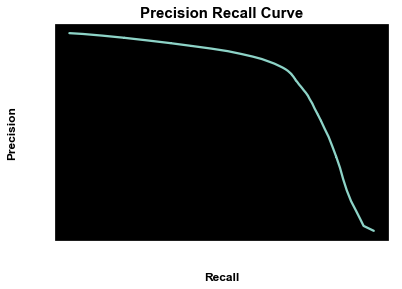

In [97]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall',color='black',fontweight='bold',fontsize=12)
plt.ylabel('Precision',color='black',fontweight='bold',fontsize=12)
plt.title('Precision Recall Curve',color='black',fontweight='bold',fontsize=15)
plt.show()

In [98]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_probs)
print("{:.2f}%".format(auc*100))

95.13%


Synthetic Minority Over Sampling Technique (SMOTE)

In [100]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [101]:
sm = SMOTE(0.80,random_state=15)
x_sm,y_sm = sm.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_sm)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


The number of classes before fit Counter({0.0: 782432, 1.0: 149752})
The number of classes after fit Counter({0.0: 782432, 1.0: 625945})


# ==============================================================

In [102]:
model = RandomForestClassifier(n_estimators=50)
model.fit(x_sm,y_sm)
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[187978   7314]
 [  9835  27920]]
0.9264139851617914
             precision    recall  f1-score   support

        0.0       0.95      0.96      0.96    195292
        1.0       0.79      0.74      0.77     37755

avg / total       0.92      0.93      0.93    233047



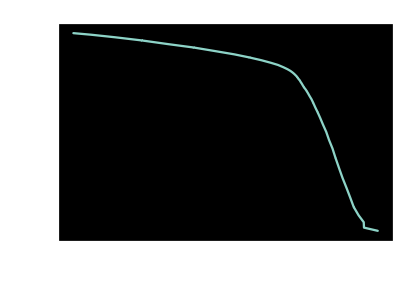

0.9461


In [103]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_probs)
print("{:.4f}".format(auc))

# ==============================================================

In [104]:
model = GradientBoostingClassifier()
model.fit(x_sm,y_sm)
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[187380   7912]
 [  9723  28032]]
0.9243285689152831
             precision    recall  f1-score   support

        0.0       0.95      0.96      0.96    195292
        1.0       0.78      0.74      0.76     37755

avg / total       0.92      0.92      0.92    233047



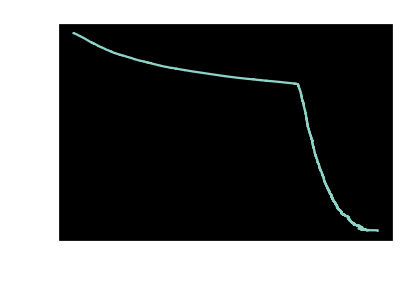

In [105]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_probs)

# Plot PR Curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [1]:
# We need to work on the following things:-
# How can we reduce False positives
# How can we reduce False Negatives